In [1]:
%pylab inline
import pynbody

Populating the interactive namespace from numpy and matplotlib


In [2]:
path='/mnt/is2/dpaz/ITV/S1373/out/'
s0=pynbody.load(path+'snapshot_050')
a=s0.properties['a']

In [3]:
gas0=s0.gas
pos0=gas0['pos']
ne0=gas0['ne']
u0=gas0['u']
rho0=gas0['rho']/a**3
rho0c=gas0['rho']

In [8]:
xbox=403.8960 
ybox=459.8882
zbox=440.9021 
xc=408.205481 - xbox + 250 
yc=457.777839 - ybox + 250   
zc=441.538681 - zbox + 250
r0=np.sqrt((pos0[:,0]-xc)**2+(pos0[:,1]-yc)**2+(pos0[:,2]-zc)**2)
r2=0
r1=8
xH=0.76
yHe=(1.0-xH)/(4.0*xH)
mp=1.6726E-24
kcgs=1.3807E-16
vv=1e10
dgs=(3*(100**2)*(0.045))/(8*np.pi*(4.3e-9)*1e10)

mu=(1.0-yHe)/(1+yHe+ne0)
te1=(5./3.-1.)*u0*vv*mu*(mp/kcgs)

[]

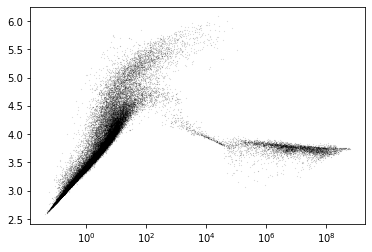

In [12]:
cut,=np.where(r0<r1)
plt.plot((rho0[cut]),np.log10(te1[cut]),'.k',markersize=.1)
plt.semilogx()

In [15]:
# LA FUNCION TEMP DEPENDE DE UNA DENSIDAD EN G/CM3 Y TIEMPO EN AÑOS
nu=1.7
Tj=5.8e4        # K
t10=1e10        # years
rhoj=1.1e-28    # g/cm3
def temp(rho,t):
    logT=(1./nu)*np.log((Tj**nu)*nu*t*rho/(t10*rhoj))
    return logT

In [16]:
d=np.arange(0.1,1,.1)
d=np.array(d)
d*1.989e43/3.085678e24

array([6.44590913e+17, 1.28918183e+18, 1.93377274e+18, 2.57836365e+18,
       3.22295457e+18, 3.86754548e+18, 4.51213639e+18, 5.15672731e+18,
       5.80131822e+18])

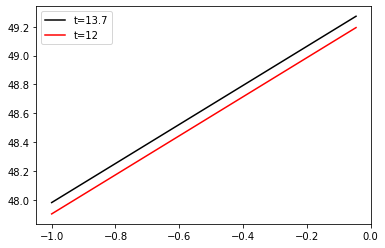

In [23]:
plt.plot(np.log10(d),temp(d, 13.719e9),color='black',label='t=13.7')
plt.plot(np.log10(d),temp(d, 12e9),color='red',label='t=12')
plt.legend()

In [14]:
d

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])